## Entendimiento del contexto

En este caso vamos a trabajar con un dataset llamado `heart_failure_clinical_records_dataset.csv` [fuente](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)

**Contexto sobre el cual vamos a trabajar:**

Las enfermedades cardiovasculares (ECV) son la causa de muerte número 1 a nivel mundial. La insuficiencia cardiaca es un evento común causado por las ECV y este dataset contiene 12 características que pueden ser usadas para predecir la mortalidad debido a una falla en el corazón.

La mayoría de las enfermedades cardiovasculares pueden ser prevenidas abordando los factores de riesgo conductuales como el consumo de tabaco, la obesidad y dieta poca saludable, la inactividad fisica y el dañino uso de alcohol, utilizando estrategias para toda la población.

Personas con (ECV) o quienes son de alto riesgo, necesitan detección temprana y manejo, aquí es donde un modelo de machine learning puede ser de gran ayuda.

**Qué vamos hacer?**

Crear un modelo para predecir la mortalidad causada por insuficiencia cardiaca.

## Entendimiento de los datos

In [66]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt # graficos
import seaborn as sns           # intenta aprox a ggplot

In [2]:
df = pd.read_csv('../data/heart_failure_clinical_records_dataset.csv',
                 sep = ',')

In [3]:
print(df.shape)
df.head()

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [13]:
report = ProfileReport(df)
report.to_file(output_file = '../salidas/report.html')

### Graficos

#### Variable y

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

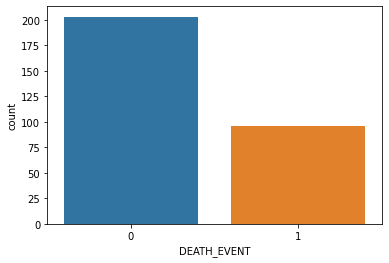

In [16]:
sns.countplot(x = 'DEATH_EVENT', data = df)

## Variables cuantitativas vs "y"

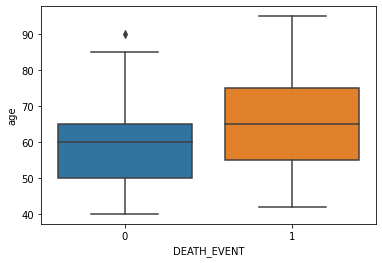

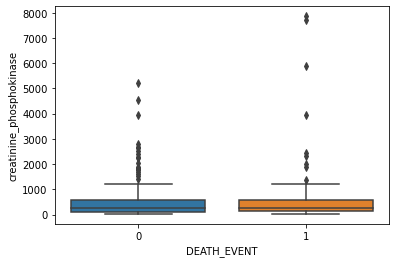

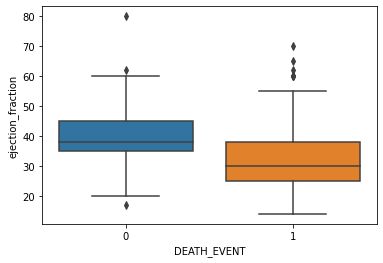

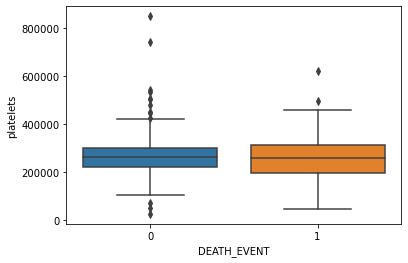

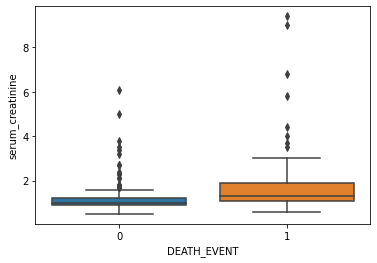

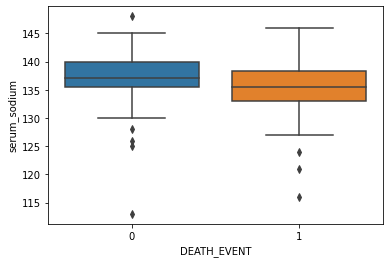

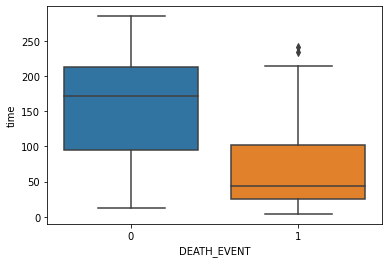

In [17]:
vars_cuanti = ['age', 
               'creatinine_phosphokinase', 
               'ejection_fraction', 
               'platelets',
               'serum_creatinine',
               'serum_sodium',
               'time'
              ]

for var in vars_cuanti:
    plt.figure()
    sns.boxplot(x = 'DEATH_EVENT', y = var, data = df)

## Variables cualitativas vs y

              anaemia
DEATH_EVENT          
0            0.408867
1            0.479167

             diabetes
DEATH_EVENT          
0            0.418719
1            0.416667

             high_blood_pressure
DEATH_EVENT                     
0                       0.325123
1                       0.406250

                  sex
DEATH_EVENT          
0            0.650246
1            0.645833

              smoking
DEATH_EVENT          
0            0.325123
1            0.312500



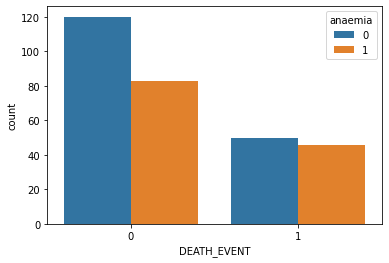

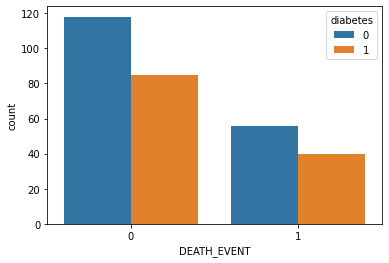

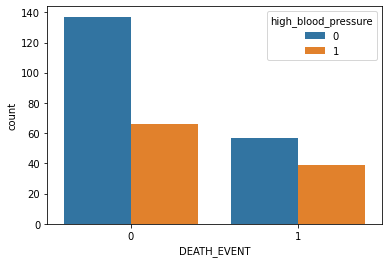

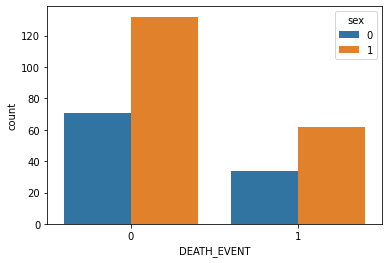

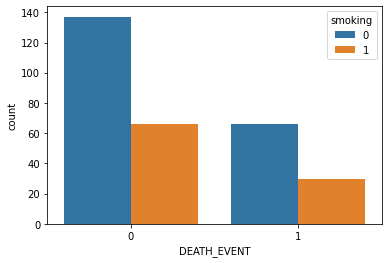

In [16]:
vars_cuali = [
                'anaemia',
                'diabetes',
                'high_blood_pressure',
                'sex',
                'smoking'
              ]

for var in vars_cuali:
    summary = df \
              .groupby(['DEATH_EVENT']) \
              .agg({var: 'mean'})
    
    print(summary)
    print('')
    plt.figure()
    sns.countplot(x = 'DEATH_EVENT', hue = var, data = df)

**Variables que pueden funcionar en el modelo**

+ `age`
+ `ejection_fraction`
+ `serum_creatinine`
+ `serum_sodium`
+ `time`
+ `anaemia`
+ `high_blood_pressure`

<AxesSubplot:>

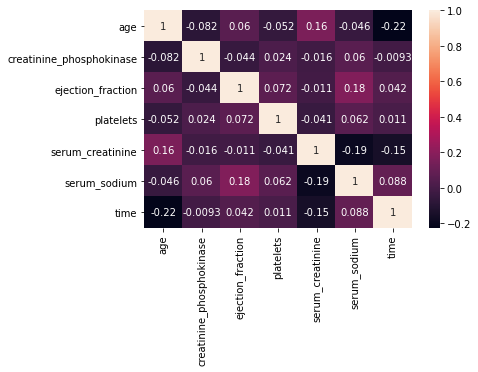

In [20]:
sns.heatmap(df[vars_cuanti].corr(), annot = True)

# Preparación de los datos

In [5]:
# creación de nuevas variables
# estandarización de variables cuantitativas de ser necesario
# Manejo de NAs
# Manejo de outliers

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
X = df.drop(columns = ['DEATH_EVENT'])
y = df['DEATH_EVENT']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
print(X_train.shape)
print(X_test.shape)

(209, 12)
(90, 12)


In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [13]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201
37,82.0,1,855,1,50,1,321000.0,1.0,145,0,0,30
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14


In [27]:
# exportemos la base de train y test
# X_train.to_csv('../data/train.txt', index = False)
X_train.to_parquet('../data/X_train.parquet', index = False, engine = 'pyarrow')
pd.DataFrame(y_train).to_parquet('../data/y_train.parquet', index = False, engine = 'pyarrow')
X_test.to_parquet('../data/X_test.parquet', index = False, engine = 'pyarrow')
pd.DataFrame(y_test).to_parquet('../data/y_test.parquet', index = False, engine = 'pyarrow')

# Modelado

In [47]:
X_train = pd.read_parquet('../data/X_train.parquet')
y_train = pd.read_parquet('../data/y_train.parquet')

X_test  = pd.read_parquet('../data/X_test.parquet')
y_test  = pd.read_parquet('../data/y_test.parquet')

y_train = y_train['DEATH_EVENT']
y_test  = y_test['DEATH_EVENT']

In [53]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
# matriz de confusion
from sklearn.metrics import plot_confusion_matrix
# reporte de metricas
from sklearn.metrics import classification_report

In [49]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

# Evaluación

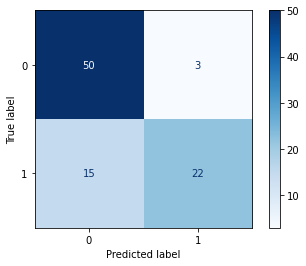

In [51]:
plot_confusion_matrix(lr, X_test, y_test, cmap = 'Blues') 

In [52]:
y_test.sum()

37

In [70]:
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:,1]

In [74]:
threshold = 0.3
y_pred2 = np.where(y_proba >= threshold, 1, 0)

In [71]:
# threshold  = 0.5
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        53
           1       0.88      0.59      0.71        37

    accuracy                           0.80        90
   macro avg       0.82      0.77      0.78        90
weighted avg       0.81      0.80      0.79        90



In [75]:
# threshold = 0.3
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        53
           1       0.74      0.70      0.72        37

    accuracy                           0.78        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.78      0.78      0.78        90



In [77]:
# threshold = 0.3 -> train
y_proba_train = lr.predict_proba(X_train)[:,1]
y_pred2 = np.where(y_proba_train >= threshold, 1, 0)
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       150
           1       0.62      0.81      0.71        59

    accuracy                           0.81       209
   macro avg       0.77      0.81      0.78       209
weighted avg       0.83      0.81      0.82       209



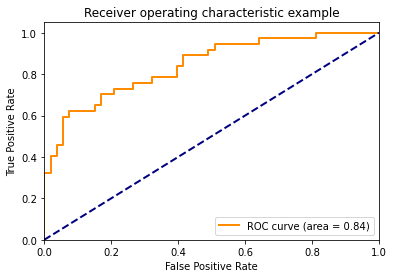

In [83]:
# Compute ROC curve and ROC area 
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()